In [64]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [67]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [68]:
# reflect an existing database into a new model
db = automap_base()
# reflect the tables
db.prepare(engine, reflect=True)


In [69]:
# View all of the classes that automap found
db.classes.keys()


['measurement', 'station']

In [70]:
# Save references to each table
meas = db.classes.measurement
stat = db.classes.station

In [71]:
# Create our session (link) from Python to the DB

# Create our session (link) from Python to the DB
session3 = Session(engine)

# Exploratory Precipitation Analysis

In [72]:
# Find the most recent date in the data set.
last_date = session3.query(meas.date).order_by(meas.date.desc()).first()
last_date

('2017-08-23',)

One year before last date: 2016-08-23


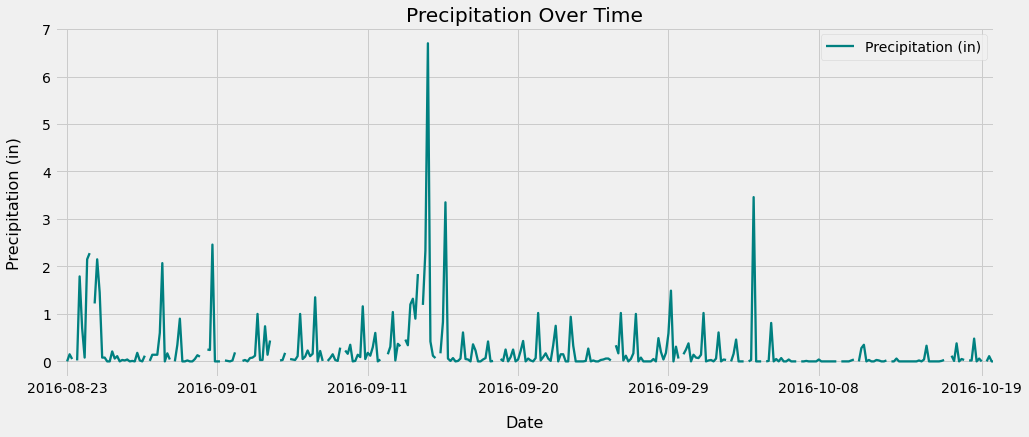

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precip = session3.query(meas.date, meas.prcp).\
    filter(meas.date >= minus_year).\
    order_by(meas.date).all()
# Calculate the date one year from the last date in data set.
minus_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f'One year before last date: {minus_year}')

# Perform a query to retrieve the data and precipitation scores
all_the_rain = sess.query(meas.date, meas.prcp).order_by(meas.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(precip, columns=["Date","Precipitation (in)"])
rain_df.set_index("Date", inplace=True)
df2 = rain_df.sort_values("Date", ascending=False)
df2.head()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,7)
rain_df.plot(title="Precipitation Over Time", xticks=(0,60,120,180,240,300,365), 
             figsize=(15,6), color = 'teal', linewidth = 2.3)

# fix axis, label, and save
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.xlim(-5,370)
plt.legend(loc='upper right')
plt.savefig("Images/precip.png")
plt.show()


In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,Precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number stations in the dataset

# Design a query to calculate the total number stations in the dataset
stat1 = session3.query(meas.station).distinct().count()
print(f'There are {stat1} stations in the dataset.')

There are 9 stations in the dataset.


In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = sess.query(meas.station, func.count(meas.station)).\
group_by(meas.station).\
order_by(func.count(meas.station).desc()).all()
active_df = pd.DataFrame(most_active, columns=["Station ID","Observations"])
active_df.sort_values("Observations", ascending=False)
active_df.head()

,Station ID,Observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
select = [func.min(meas.tobs), func.max(meas.tobs), func.avg(meas.tobs)]
min_max = sess.query(*select).\
    filter(meas.station == "USC00519281").all()
print(f'The Minimum, Maximum, and Average of the most active station\nare as follows: {min_max}')

The Minimum, Maximum, and Average of the most active station
are as follows: [(54.0, 85.0, 71.66378066378067)]


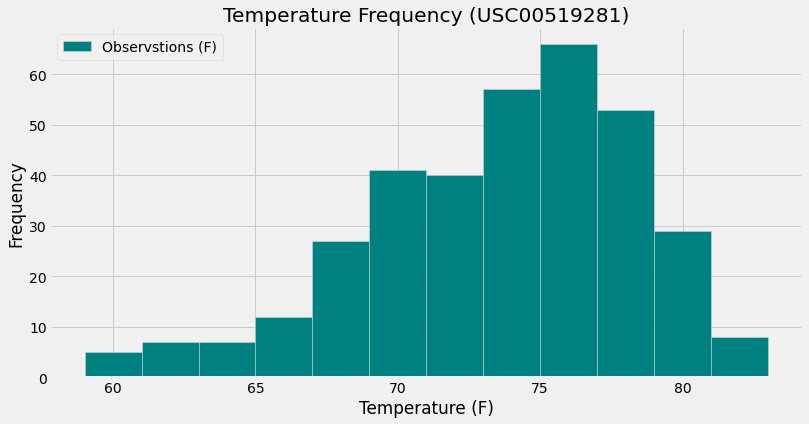

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = sess.query(meas.tobs).\
    filter(meas.date >= minus_year).\
    filter(meas.station == "USC00519281").\
    order_by(meas.date).all()

temp_df = pd.DataFrame(temp_obs, columns=["Observstions (F)"])

temp_df.plot.hist(bins=12, title="Temperature Frequency (USC00519281)", 
                  figsize=(12,6),color = 'teal', edgecolor='xkcd:light gray')
plt.xlabel("Temperature (F)")
plt.legend(loc="upper left")
plt.savefig("Images/temp.png")
plt.show()

# Close session

In [79]:
# Close Session
session3.close()

In [80]:
minus_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f'One year before last date: {minus_year}')

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precip = sess.query(meas.date, meas.prcp).\
    filter(meas.date >= minus_year).\
    order_by(meas.date).all()

One year before last date: 2016-08-23


In [81]:
precip

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [82]:
[{date:value} for date, value in precip]

[{'2016-08-23': 0.0},
 {'2016-08-23': 0.15},
 {'2016-08-23': 0.05},
 {'2016-08-23': None},
 {'2016-08-23': 0.02},
 {'2016-08-23': 1.79},
 {'2016-08-23': 0.7},
 {'2016-08-24': 0.08},
 {'2016-08-24': 2.15},
 {'2016-08-24': 2.28},
 {'2016-08-24': None},
 {'2016-08-24': 1.22},
 {'2016-08-24': 2.15},
 {'2016-08-24': 1.45},
 {'2016-08-25': 0.08},
 {'2016-08-25': 0.08},
 {'2016-08-25': 0.0},
 {'2016-08-25': 0.0},
 {'2016-08-25': 0.21},
 {'2016-08-25': 0.06},
 {'2016-08-25': 0.11},
 {'2016-08-26': 0.0},
 {'2016-08-26': 0.03},
 {'2016-08-26': 0.02},
 {'2016-08-26': 0.04},
 {'2016-08-26': 0.0},
 {'2016-08-26': 0.01},
 {'2016-08-27': 0.0},
 {'2016-08-27': 0.18},
 {'2016-08-27': 0.02},
 {'2016-08-27': 0.0},
 {'2016-08-27': 0.12},
 {'2016-08-27': None},
 {'2016-08-28': 0.01},
 {'2016-08-28': 0.14},
 {'2016-08-28': 0.14},
 {'2016-08-28': 0.14},
 {'2016-08-28': 0.6},
 {'2016-08-28': 2.07},
 {'2016-08-29': 0.0},
 {'2016-08-29': 0.17},
 {'2016-08-29': 0.04},
 {'2016-08-29': None},
 {'2016-08-29': 0.0},

In [83]:
select = [func.min(meas.tobs), func.max(meas.tobs), func.avg(meas.tobs)]
min_max = sess.query(*select).\
    filter(meas.date > '2016-01-01').all()
print(f'The Minimum, Maximum, and Average of the most active station\nare as follows: {min_max}')

The Minimum, Maximum, and Average of the most active station
are as follows: [(56.0, 87.0, 74.15378378378378)]


In [84]:
min_max[0]

(56.0, 87.0, 74.15378378378378)

In [85]:
list(min_max[0])

[56.0, 87.0, 74.15378378378378]

In [86]:
station = sess.query(stat.station, stat.name).all()
station

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [87]:
[{ID:name} for ID, name in station]

[{'USC00519397': 'WAIKIKI 717.2, HI US'},
 {'USC00513117': 'KANEOHE 838.1, HI US'},
 {'USC00514830': 'KUALOA RANCH HEADQUARTERS 886.9, HI US'},
 {'USC00517948': 'PEARL CITY, HI US'},
 {'USC00518838': 'UPPER WAHIAWA 874.3, HI US'},
 {'USC00519523': 'WAIMANALO EXPERIMENTAL FARM, HI US'},
 {'USC00519281': 'WAIHEE 837.5, HI US'},
 {'USC00511918': 'HONOLULU OBSERVATORY 702.2, HI US'},
 {'USC00516128': 'MANOA LYON ARBO 785.2, HI US'}]

In [88]:
temp_obs = sess.query(meas.tobs).\
    filter(meas.date >= minus_year).\
    filter(meas.station == "USC00519281").\
    order_by(meas.date).all()
temp_obs

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [89]:
out = [item for t in temp_obs for item in t]
out

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

In [93]:
session3 = Session(engine)
select = session3.query(meas.date, func.min(meas.tobs), func.avg(meas.tobs), func.max(meas.tobs)).\
start_end = session3.query(*select).\
filter(meas.date >= start).\
group_by(meas.date).all()

NameError: name 'start' is not defined